<a href="https://colab.research.google.com/github/gunelr/Loan_Approval_Prediction_ML/blob/main/Loan_Approval_Prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2 

## Credit / Home Loans - AutoML vs Bespoke ML

Standard Bank is embracing the digital transformation wave and intends to use new and exciting technologies to give their customers a complete set of services from the convenience of their mobile devices.
As Africa’s biggest lender by assets, the bank aims to improve the current process in which potential borrowers apply for a home loan. The current process involves loan officers having to manually process home loan applications. This process takes 2 to 3 days to process upon which the applicant will receive communication on whether or not they have been granted the loan for the requested amount.
To improve the process Standard Bank wants to make use of machine learning to assess the credit worthiness of an applicant by implementing a model that will predict if the potential borrower will default on his/her loan or not, and do this such that the applicant receives a response immediately after completing their application. 

- train will serve as the historical dataset that the model will be trained on and,
- test will serve as unseen data we will predict on, i.e. new ('future') applicants.

### Part One

The Home Loans Department manager wants to know the following:

1. An overview of the data. (HINT: Provide the number of records, fields and their data types. Do for both).

2. What data quality issues exist in both train and test? (HINT: Comment any missing values and duplicates)

3. How do the the loan statuses compare? i.e. what is the distrubition of each?

4. How do women and men compare when it comes to defaulting on loans in the historical dataset?

5. How many of the loan applicants have dependents based on the historical dataset?

6. How do the incomes of those who are employed compare to those who are self employed based on the historical dataset? 

7. Are applicants with a credit history more likely to default than those who do not have one?

8. Is there a correlation between the applicant's income and the loan amount they applied for? 

### Part Two

 ML section


 


## Import Libraries




In [ ]:
!pip install sweetviz 
#uncomment the above if you need to install the library 
#uncomment the above if you need to install the library 

In [ ]:
!pip install auto-sklearn

In [ ]:
!pip install --upgrade scipy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

In [ ]:
import autosklearn.classification

## Import Datasets

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Part One

## EDA

In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
# we concat for easy analysis
n = train.shape[0] # we set this to be able to separate the
df = pd.concat([train, test], axis=0)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### EDA 


In [ ]:
# 1.An overview of the data. (HINT: Provide the number of records, fields and their data types. Do for both).

print(df.shape)

(981, 13)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [ ]:
# 2. What data quality issues exist in both train and test? (HINT: Comment any missing values and duplicates)

train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
train.duplicated().sum()

0

In [ ]:
test.duplicated().sum()

0

<AxesSubplot:>

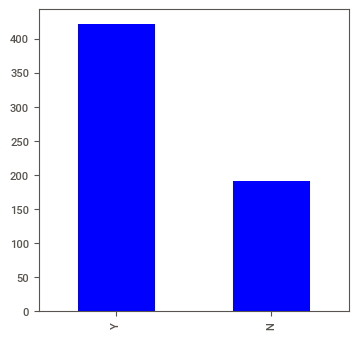

In [ ]:
# 3.How do the the loan statuses compare? i.e. what is the distrubition of each?

train['Loan_Status'].value_counts().plot.bar(color='blue',figsize = (4,4))

Male      150
Female     37
Name: Gender, dtype: int64


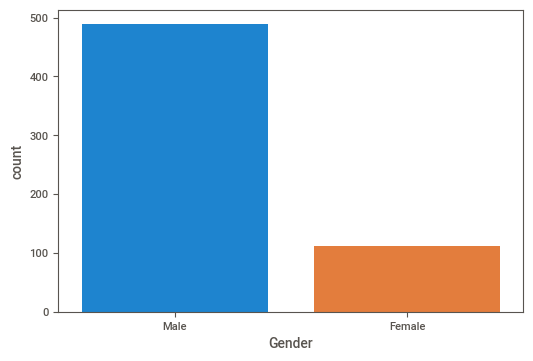

In [ ]:
# 4. How do women and men compare when it comes to defaulting on loans in the historical dataset?

defaulting = train.query("Loan_Status == 'N'")
print(defaulting.Gender.value_counts())
sns.countplot(x = "Gender", data = train);

In [ ]:
# 5. How many of the loan applicants have dependents based on the historical dataset?

len(df[(df['Dependents']!='0')])


436

<AxesSubplot:ylabel='ApplicantIncome'>

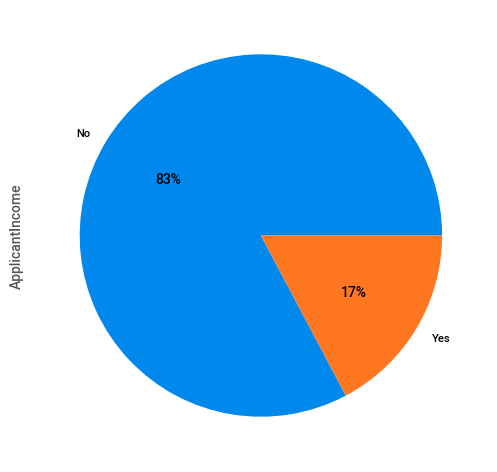

In [ ]:
# 6. How do the incomes of those who are employed compare to those who are self employed based on the historical dataset?

df.groupby("Self_Employed")["ApplicantIncome"].sum().plot(kind='pie', y='Self_Employed', autopct='%1.0f%%', figsize = (6,6))


In [ ]:
df.groupby("Self_Employed")["ApplicantIncome"].sum()

Self_Employed
No     3947869
Yes     822597
Name: ApplicantIncome, dtype: int64

In [ ]:
# 7. Are applicants with a credit history more likely to default than those who do not have one?

n = len(df)

prob0 = (df['Credit_History'] == 0.0).sum()/n

prob1 = (df['Credit_History'] == 1.0).sum()/n

print('prob0 : {}%'.format(100*round(prob0, 4)), '\nprob1: {}%'.format(100*round(prob1, 4)))

prob0 : 15.09% 
prob1: 76.86%


<AxesSubplot:>

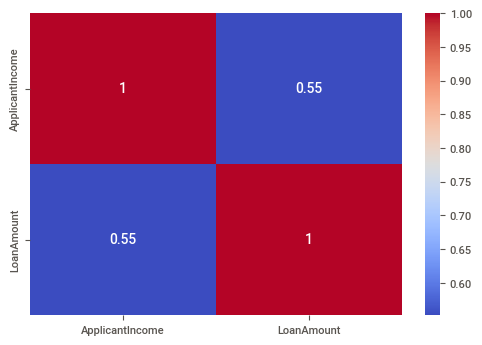

In [ ]:
#Is there a correlation between the applicant's income and the loan amount they applied for?

corr = df[['ApplicantIncome', 'LoanAmount']]

sns.heatmap(corr.corr(), annot = True, cmap= 'coolwarm')


In [ ]:
corr.corr()

,ApplicantIncome,LoanAmount
ApplicantIncome,1.000000,0.551811
LoanAmount,0.551811,1.000000


## Anwers:

1. The data consists of 981 observations and 13 variables, with 8 of them being categorical and 5 numerical. 614 of the observations are designated for training, while the remaining are for testing.

2. There are missing values in both training and testing datasets, which will be filled before using in machine learning models. There are no duplicate values in the data.

3. 'Loan_Status' has 2 distinct value: 'Y', 'N'. Number of 'Y' is 422, 'N' is 192. When we look at the credit status, we see that the weight of the people with a yes credit status in the data is higher. If this ratio is too high, it can be a problem for ml algorithms.

4. Male = 150;
In the data set, it is seen that men are more common among the observations with defaulting on loans.

5. Number of the loan applicants who are obliged to look after someone is 436.

6. Incomes of those who are employed ('Self_Employed'=='No') is 3947869 (83%).
   Incomes of those who are Self_Employed ('Self_Employed'=='Yes') is 822597 (17%).
   It is seen that the incomes of those who are employed are higher.

7. Applicants with a credit history more likely to default than those who do not have credit_history.
probability of 0.0  with percent: 15.09, probability of 1.0 with percent: 84.91
It has been observed that the number of defaults is higher for those with a credit history.

8. Correlation is 0.55. It shows that there is not a strong relationship between the income of the person applying for amount of credit applied for.






# Part Two

## ML section


In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.isna().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [ ]:
df.Loan_Status = np.where(df.Loan_Status.isna(), 'Test', df.Loan_Status)
df.Gender = df.Gender.fillna(df.Gender.mode()[0])
df.Married = df.Married.fillna(df.Married.mode()[0])
df.Dependents = df.Dependents.fillna(df.Dependents.mode()[0])
df.Self_Employed = df.Self_Employed.fillna(df.Self_Employed.mode()[0])
df.LoanAmount = df.LoanAmount.fillna(df.groupby('Education')['LoanAmount'].transform('median'))
df.Loan_Amount_Term = df.Loan_Amount_Term.fillna(df.groupby('Education')['Loan_Amount_Term'].transform('median'))
df.Credit_History = df.Credit_History.fillna(df['Credit_History'].median())

In [ ]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
df.drop('Loan_ID', axis = 1, inplace = True)
tr_set = df[df['Loan_Status'] != 'Test']
ts_set = df[df['Loan_Status'] == 'Test']

In [ ]:
Y = tr_set.Loan_Status
Y = np.where(Y == 'Y', 1, 0)
X = pd.get_dummies(tr_set.drop('Loan_Status', axis = 1), drop_first = True)
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,130.5,360.0,1.0,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,0,0,0,0
610,4106,0.0,40.0,180.0,1.0,1,1,0,0,1,0,0,0,0
611,8072,240.0,253.0,360.0,1.0,1,1,1,0,0,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,1,1,0,1,0,0,0,0,1


In [ ]:
sc = StandardScaler()
X = sc.fit_transform(X)
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.072991,-0.554487,-0.180823,0.273231,0.411733,0.472343,-1.372089,-0.446339,-0.443713,-0.300975,-0.528362,-0.392601,-0.782016,1.428147
1,-0.134412,-0.038732,-0.210564,0.273231,0.411733,0.472343,0.728816,2.240448,-0.443713,-0.300975,-0.528362,-0.392601,-0.782016,-0.700208
2,-0.393747,-0.554487,-0.948154,0.273231,0.411733,0.472343,0.728816,-0.446339,-0.443713,-0.300975,-0.528362,2.547117,-0.782016,1.428147
3,-0.462062,0.251980,-0.305737,0.273231,0.411733,0.472343,0.728816,-0.446339,-0.443713,-0.300975,1.892641,-0.392601,-0.782016,1.428147
4,0.097728,-0.554487,-0.055908,0.273231,0.411733,0.472343,-1.372089,-0.446339,-0.443713,-0.300975,-0.528362,-0.392601,-0.782016,1.428147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.410130,-0.554487,-0.888671,0.273231,0.411733,-2.117107,-1.372089,-0.446339,-0.443713,-0.300975,-0.528362,-0.392601,-0.782016,-0.700208
610,-0.212557,-0.554487,-1.257466,-2.522836,0.411733,0.472343,0.728816,-0.446339,-0.443713,3.322532,-0.528362,-0.392601,-0.782016,-0.700208
611,0.437174,-0.472404,1.276512,0.273231,0.411733,0.472343,0.728816,2.240448,-0.443713,-0.300975,-0.528362,-0.392601,-0.782016,1.428147
612,0.357064,-0.554487,0.491336,0.273231,0.411733,0.472343,0.728816,-0.446339,2.253710,-0.300975,-0.528362,-0.392601,-0.782016,1.428147


In [ ]:
from sklearn.model_selection import StratifiedKFold


In [ ]:
from sklearn.experimental import enable_halving_search_cv 


In [ ]:
from sklearn.model_selection import HalvingGridSearchCV

In [ ]:
cv_out= StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
cv_in = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

models = []
cv_score = []
fold = 0
for train_index, test_index in cv_out.split(X, Y):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = Y[train_index], Y[test_index]
        params = {'C': np.logspace(-4, 4, 20),
                   'solver':['liblinear'],
                  'penalty': ['l1', 'l2']}
        model = LogisticRegression()
        grid_search = HalvingGridSearchCV(model, param_grid = params, cv =  cv_in,  scoring='accuracy')
        grid_result = grid_search.fit(X_train, y_train)
        best_params = grid_result.best_params_
        models.append(model.set_params(**best_params))
        score = grid_search.score(X_test, y_test)
        cv_score.append(score)
        fold = fold + 1
        print(f'Fold {fold}: train score => {score}')
print(f'CV score = > {np.mean(cv_score)}')

Fold 1: train score => 0.8048780487804879
Fold 2: train score => 0.7967479674796748
Fold 3: train score => 0.8130081300813008
Fold 4: train score => 0.8048780487804879
Fold 5: train score => 0.8360655737704918
CV score = > 0.8111155537784887


In [ ]:
high_score_model = LogisticRegression()
high_score_model.set_params(**(models[4].get_params()))
high_score_model

LogisticRegression(C=0.23357214690901212, penalty='l1', solver='liblinear')

In [ ]:
high_score_model.fit(X, Y)
high_score_model.score(X, Y)

0.8127035830618893

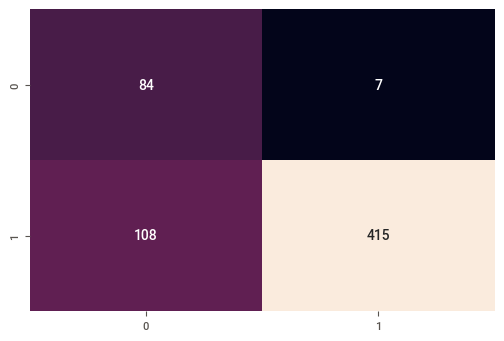

In [ ]:
y_pred = high_score_model.predict(X)
cf = confusion_matrix(y_pred, Y)
sns.heatmap(cf, annot = True, fmt = '.4g', cbar=False);